# Analyzing Covid

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading Data

In [2]:
d=pd.read_csv('covid.csv')

### Display Data

In [3]:
d

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0


In [4]:
d.info

<bound method DataFrame.info of          SNo ObservationDate Province/State  Country/Region  \
0          1      01/22/2020          Anhui  Mainland China   
1          2      01/22/2020        Beijing  Mainland China   
2          3      01/22/2020      Chongqing  Mainland China   
3          4      01/22/2020         Fujian  Mainland China   
4          5      01/22/2020          Gansu  Mainland China   
...      ...             ...            ...             ...   
18322  18323      04/24/2020        Wyoming              US   
18323  18324      04/24/2020       Xinjiang  Mainland China   
18324  18325      04/24/2020          Yukon          Canada   
18325  18326      04/24/2020         Yunnan  Mainland China   
18326  18327      04/24/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00        1.0     0.0        0.0  
1          1/22/2020 17:00       14.0     0.0        0.0  
2          1/22/2020 17:00        

### Sample Data

In [7]:
d.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
5031,5032,03/12/2020,Victoria,Australia,2020-03-11T18:52:04,21.0,0.0,7.0
14254,14255,04/12/2020,NaN,Kazakhstan,2020-04-12 23:25:00,951.0,10.0,99.0
522,523,02/01/2020,Xinjiang,Mainland China,2/1/2020 5:37,18.0,0.0,0.0
16199,16200,04/18/2020,NaN,Mongolia,2020-04-18 22:40:18,31.0,0.0,5.0
16308,16309,04/18/2020,Guangdong,Mainland China,2020-04-18 22:40:18,1579.0,8.0,1482.0


### Data Cleaning

In [8]:
d=pd.read_csv('covid.csv',index_col=0)

In [9]:
d

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


### To check how many rows and columns


In [10]:
d.shape

(18327, 7)

### To print field's name

In [12]:
d.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

### Description of the data

In [13]:
d.describe()

,Confirmed,Deaths,Recovered
count,18327.000000,18327.000000,18327.000000
mean,3030.015551,180.680417,764.542424
std,15129.079515,1362.099905,5618.658958
min,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000
50%,101.000000,1.000000,2.000000
75%,674.500000,8.000000,71.000000
max,271590.000000,25969.000000,109800.000000


In [14]:
d.describe(include='all')

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
count,18327,9050,18327,18327,18327.000000,18327.000000,18327.000000
unique,94,297,220,1835,NaN,NaN,NaN
top,04/10/2020,Diamond Princess cruise ship,US,3/8/20 5:31,NaN,NaN,NaN
freq,321,125,3540,1232,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3030.015551,180.680417,764.542424
std,NaN,NaN,NaN,NaN,15129.079515,1362.099905,5618.658958
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,9.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,101.000000,1.000000,2.000000
75%,NaN,NaN,NaN,NaN,674.500000,8.000000,71.000000


In [15]:
d.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.899834,0.660188
Deaths,0.899834,1.000000,0.564944
Recovered,0.660188,0.564944,1.000000


### Checking for Null values

In [16]:
d.isna()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
18323,False,False,False,False,False,False,False
18324,False,False,False,False,False,False,False
18325,False,False,False,False,False,False,False


In [17]:
d.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [18]:
d.isnull().sum().sum()

9277

In [19]:
d.drop('Province/State',axis=1,inplace=True)

In [20]:
d

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...
18323,04/24/2020,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


### Rename the Country/Region

In [21]:
d.rename(columns={'Country/Region':'Country'},inplace=True)

In [22]:
d

,ObservationDate,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...
18323,04/24/2020,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


In [23]:
d.duplicated()

SNo
1        False
2        False
3        False
4         True
5        False
         ...  
18323    False
18324    False
18325    False
18326    False
18327    False
Length: 18327, dtype: bool

In [24]:
d.duplicated().sum()

347

In [25]:
d=d.drop_duplicates()

In [26]:
d

,ObservationDate,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
...,...,...,...,...,...,...
18323,04/24/2020,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


In [27]:
d.duplicated().sum()

0

In [28]:
d.sort_values(by='ObservationDate',ascending=False)

,ObservationDate,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
18327,04/24/2020,Mainland China,2020-04-25 06:31:19,1268.0,1.0,1256.0
18168,04/24/2020,Syria,2020-04-25 06:31:19,42.0,3.0,6.0
18110,04/24/2020,Malaysia,2020-04-25 06:31:19,5691.0,96.0,3663.0
18111,04/24/2020,Maldives,2020-04-25 06:31:19,129.0,0.0,16.0
18112,04/24/2020,Mali,2020-04-25 06:31:19,325.0,21.0,87.0
...,...,...,...,...,...,...
35,01/22/2020,Mainland China,1/22/2020 17:00,10.0,0.0,0.0
36,01/22/2020,Japan,1/22/2020 17:00,2.0,0.0,0.0
37,01/22/2020,Thailand,1/22/2020 17:00,2.0,0.0,0.0


### Counting the number of countries

In [29]:
d['Country'].value_counts()

US                     3311
Mainland China         2856
Canada                  721
Australia               566
France                  463
                       ... 
 Azerbaijan               1
North Ireland             1
Republic of Ireland       1
East Timor                1
Cape Verde                1
Name: Country, Length: 220, dtype: int64

### Country with maximum/minimum entries

In [30]:
d['Country'].value_counts().max()

3311

In [31]:
d['Country'].value_counts().min()

1

In [32]:
d['Deaths'].value_counts().max()

7754

In [33]:
d['Country'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

### Creating a copy of data

In [34]:
d1=d.copy()

In [35]:
d1

,ObservationDate,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
...,...,...,...,...,...,...
18323,04/24/2020,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


In [36]:
n=d.groupby('Country').Deaths.sum().sort_values(ascending=False)
n

Country
US                                631502.0
Italy                             597687.0
Spain                             460470.0
France                            367150.0
UK                                270200.0
                                    ...   
Macau                                  0.0
Laos                                   0.0
('St. Martin',)                        0.0
Jersey                                 0.0
occupied Palestinian territory         0.0
Name: Deaths, Length: 220, dtype: float64

In [37]:
n=d.groupby('Country').Confirmed.sum().sort_values(ascending=False)
n

Country
US                       14591043.0
Mainland China            6148236.0
Italy                     4936614.0
Spain                     4735954.0
Germany                   3574181.0
                            ...    
Cape Verde                      1.0
North Ireland                   1.0
The Gambia                      1.0
Republic of the Congo           1.0
 Azerbaijan                     1.0
Name: Confirmed, Length: 220, dtype: float64

### Grouping Cases as per the Date

In [40]:
d['ObservationDate'] = pd.to_datetime(d['ObservationDate'])

In [41]:
date_wise = d.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
date_wise.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,529.0,17.0,28.0
2020-01-23,601.0,18.0,30.0
2020-01-24,880.0,26.0,36.0
2020-01-25,1408.0,42.0,39.0
2020-01-26,2043.0,56.0,52.0


### Total Number of Confirmed Cases around the World

In [42]:
date_wise['Confirmed'].iloc[-1]

2811193.0

### Total Number of Recoverd Cases around the World

In [43]:
date_wise['Recovered'].iloc[-1]

793601.0

### Total Number of Deaths Cases around the World

In [44]:
date_wise['Deaths'].iloc[-1]

197159.0

### Total Number of Active Cases

In [45]:
date_wise['Confirmed'].iloc[-1]-date_wise['Recovered'].iloc[-1]-date_wise['Deaths'].iloc[-1]

1820433.0

### Total Number of Closed Cases

In [46]:
date_wise['Deaths'].iloc[-1]+date_wise['Recovered'].iloc[-1

990760.0

### Data visualization

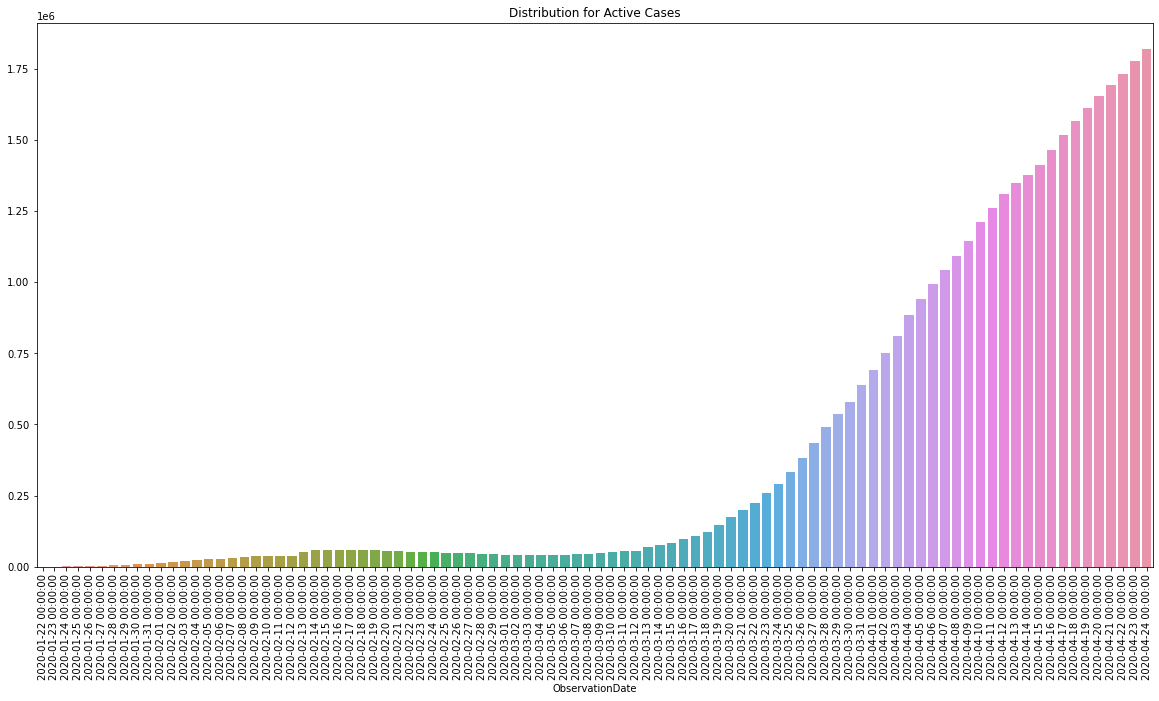

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x=date_wise.index,y=date_wise['Confirmed']-date_wise['Recovered']-date_wise['Deaths'])
plt.xticks(rotation=90)
plt.title('Distribution for Active Cases')
plt.show()

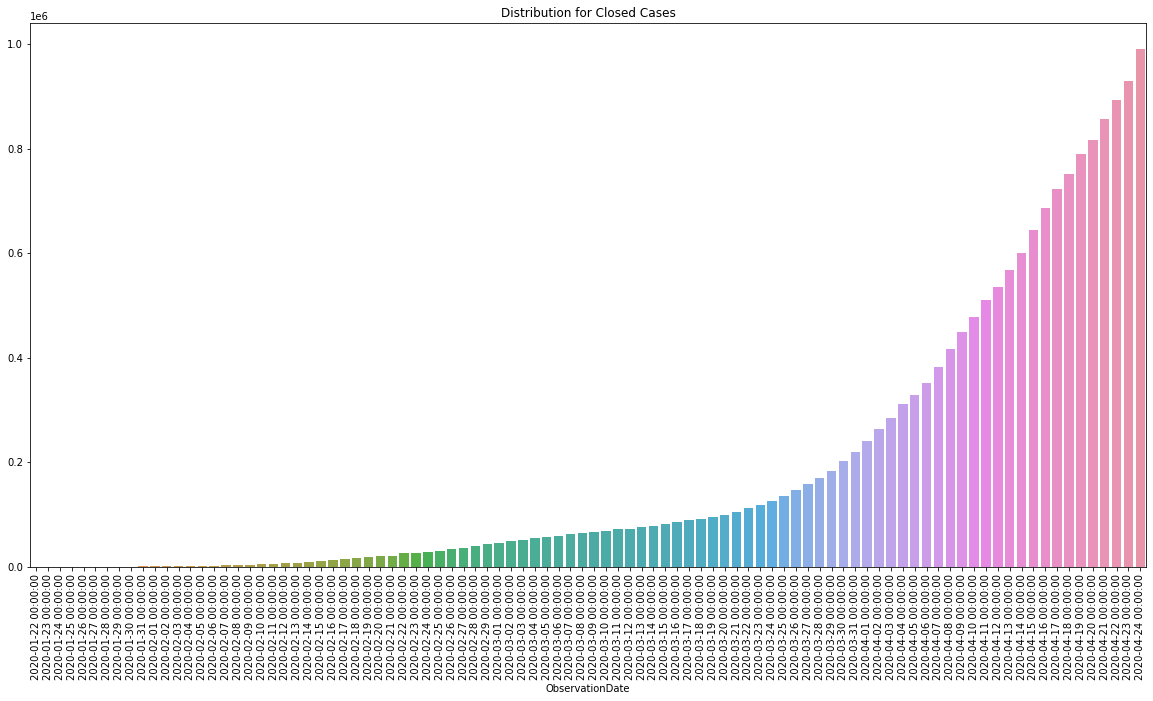

In [48]:
plt.figure(figsize=(20,10))
sns.barplot(x=date_wise.index,y=date_wise['Recovered']+date_wise['Deaths'])
plt.xticks(rotation=90)
plt.title('Distribution for Closed Cases')
plt.show()

In [49]:
date_wise['week']=date_wise.index.weekofyear
date_wise

,Confirmed,Deaths,Recovered,week
ObservationDate,,,,
2020-01-22,529.0,17.0,28.0,4
2020-01-23,601.0,18.0,30.0,4
2020-01-24,880.0,26.0,36.0,4
2020-01-25,1408.0,42.0,39.0,4
2020-01-26,2043.0,56.0,52.0,4
...,...,...,...,...
2020-04-20,2472259.0,169986.0,645738.0,17
2020-04-21,2549123.0,176583.0,679819.0,17
2020-04-22,2623960.0,183066.0,709694.0,17


In [50]:
week_num=[]
week_confirmed=[]
week_deaths=[]
week_recovered=[]
w = 1
for i in list(date_wise['week'].unique()):
    week_confirmed.append(date_wise[date_wise['week']==i]['Deaths'].iloc[-1])
    week_deaths.append(date_wise[date_wise['week']==i]['Confirmed'].iloc[-1])
    week_recovered.append(date_wise[date_wise['week']==i]['Recovered'].iloc[-1])
    week_num.append(w)
    w = w + 1
   

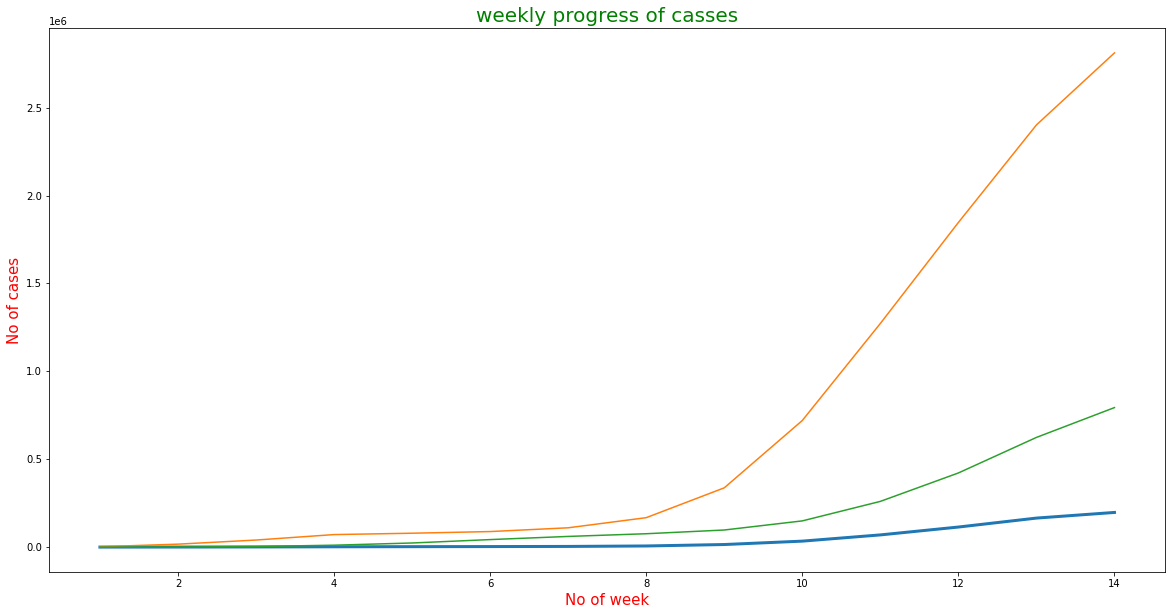

In [51]:
plt.figure(figsize=(20,10))
plt.plot(week_num,week_confirmed,linewidth=3)
plt.plot(week_num,week_deaths)
plt.plot(week_num,week_recovered)
plt.xlabel('No of week',fontsize=15,color='red')
plt.ylabel('No of cases',fontsize=15,color='red')
plt.title('weekly progress of casses',fontsize=20,color='green')
plt.show()

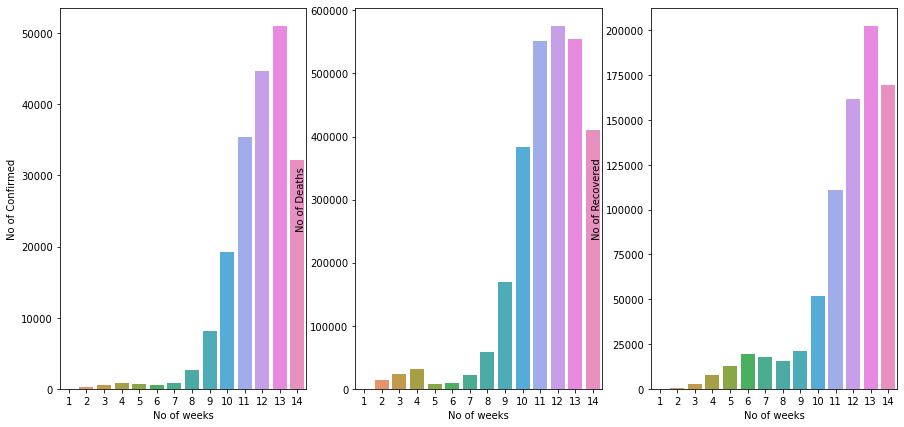

In [52]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,7))
sns.barplot(x=week_num,y=pd.Series(week_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(week_deaths).diff().fillna(0),ax=ax2)
sns.barplot(x=week_num,y=pd.Series(week_recovered).diff().fillna(0),ax=ax3)
ax1.set_xlabel('No of weeks')
ax2.set_xlabel('No of weeks')
ax3.set_xlabel('No of weeks')
ax1.set_ylabel('No of Confirmed')
ax2.set_ylabel('No of Deaths')
ax3.set_ylabel('No of Recovered')
plt.show()

In [53]:
np.round(date_wise['Confirmed'].diff().fillna(0).mean())

29901.0

In [54]:
np.round(date_wise['Deaths'].diff().fillna(0).mean())

2097.0

In [55]:
np.round(date_wise['Recovered'].diff().fillna(0).mean())

8442.0

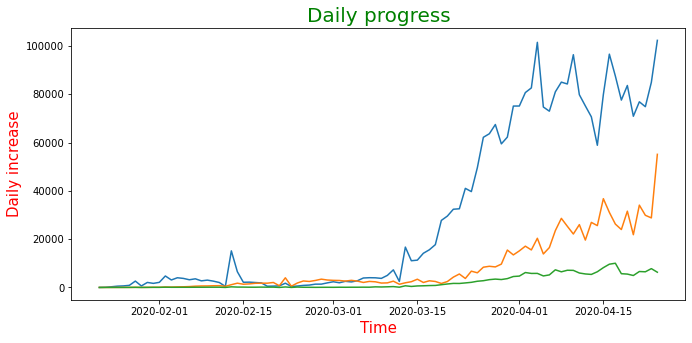

In [56]:
plt.figure(figsize=(11,5))
plt.plot(date_wise['Confirmed'].diff().fillna(0),label='Daily increase in confirm cases')
plt.plot(date_wise['Recovered'].diff().fillna(0),label='Daily increase in Recovery cases')
plt.plot(date_wise['Deaths'].diff().fillna(0),label='Daily increase in Deaths cases')
plt.xlabel('Time',fontsize=15,color='red')
plt.ylabel('Daily increase',fontsize=15,color='red')
plt.title('Daily progress',fontsize=20,color='green')
plt.show()

In [58]:
country_wise=d[d['ObservationDate']==d['ObservationDate'].max()].groupby(['Country']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(["Confirmed"],ascending=False)
country_wise

,Confirmed,Recovered,Deaths
Country,,,
US,905333.0,99079.0,51949.0
Spain,219764.0,92355.0,22524.0
Italy,192994.0,60498.0,25969.0
France,159952.0,44271.0,22279.0
Germany,154999.0,109800.0,5760.0
...,...,...,...
Bhutan,7.0,3.0,0.0
Western Sahara,6.0,5.0,0.0
South Sudan,5.0,0.0,0.0


In [59]:
country_wise['mortality']=(country_wise['Deaths']/country_wise['Recovered'])*100
country_wise

,Confirmed,Recovered,Deaths,mortality
Country,,,,
US,905333.0,99079.0,51949.0,52.431898
Spain,219764.0,92355.0,22524.0,24.388501
Italy,192994.0,60498.0,25969.0,42.925386
France,159952.0,44271.0,22279.0,50.324140
Germany,154999.0,109800.0,5760.0,5.245902
...,...,...,...,...
Bhutan,7.0,3.0,0.0,0.000000
Western Sahara,6.0,5.0,0.0,0.000000
South Sudan,5.0,0.0,0.0,NaN


In [60]:
country_wise['Recovered']=(country_wise['Recovered']/country_wise['Confirmed'])*100
country_wise

,Confirmed,Recovered,Deaths,mortality
Country,,,,
US,905333.0,10.943929,51949.0,52.431898
Spain,219764.0,42.024626,22524.0,24.388501
Italy,192994.0,31.347089,25969.0,42.925386
France,159952.0,27.677678,22279.0,50.324140
Germany,154999.0,70.839167,5760.0,5.245902
...,...,...,...,...
Bhutan,7.0,42.857143,0.0,0.000000
Western Sahara,6.0,83.333333,0.0,0.000000
South Sudan,5.0,0.000000,0.0,NaN


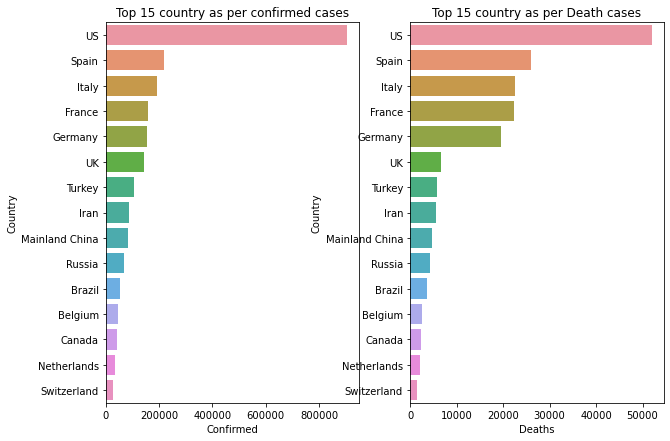

In [62]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,7))
top15_Confirmed=country_wise.sort_values(['Confirmed'],ascending=False).head(15)
top15_Deaths=country_wise.sort_values(['Deaths'],ascending=False).head(15)
sns.barplot(x=top15_Confirmed['Confirmed'],y=top15_Confirmed.index,ax=ax1)
sns.barplot(x=top15_Deaths['Deaths'],y=top15_Confirmed.index,ax=ax2)
ax1.set_title('Top 15 country as per confirmed cases')
ax2.set_title('Top 15 country as per Death cases')
plt.show()

### BarPlot

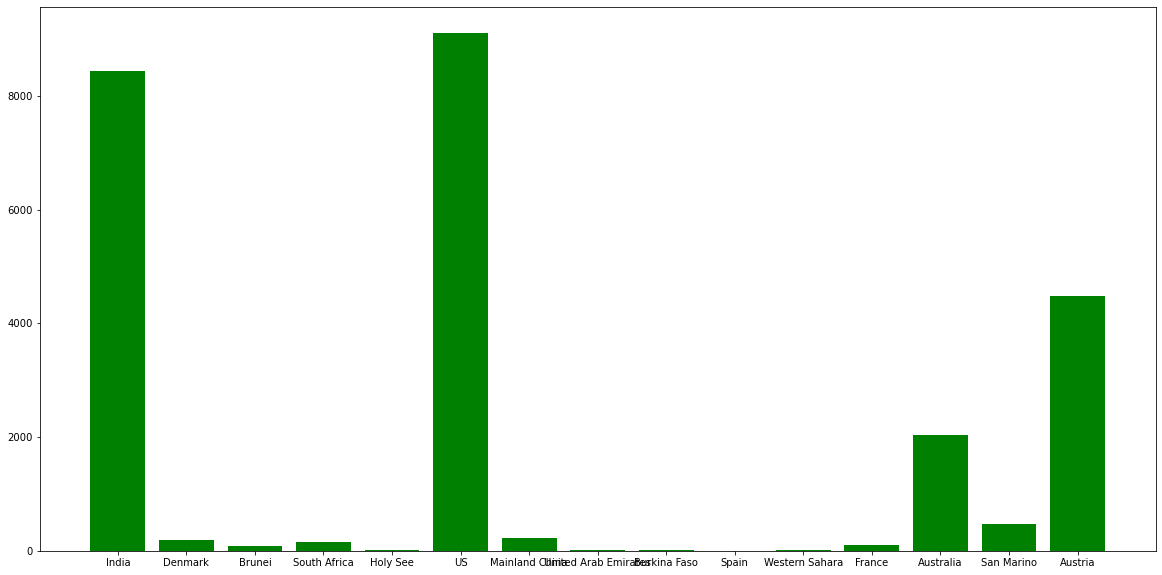

In [63]:
d1=d.sample(25)
plt.figure(figsize=(20,10))
plt.bar('Country','Confirmed', data=d1,color='green')
plt.show()

### Count Plot

1.0       3
6.0       2
82.0      1
2.0       1
8446.0    1
100.0     1
476.0     1
2032.0    1
62.0      1
86.0      1
49.0      1
8053.0    1
15.0      1
184.0     1
183.0     1
18.0      1
9.0       1
9107.0    1
230.0     1
150.0     1
83.0      1
4474.0    1
Name: Confirmed, dtype: int64


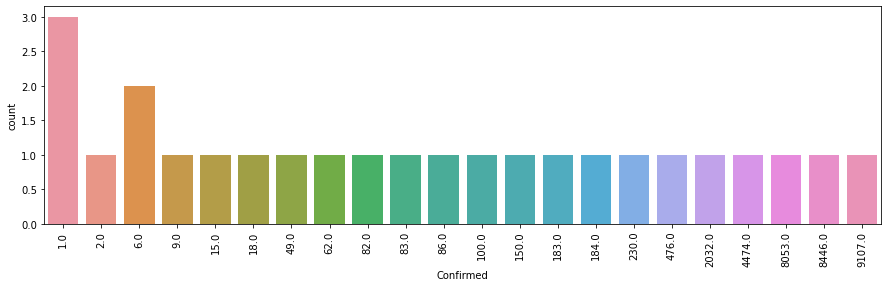

In [65]:
print(d1['Confirmed'].value_counts())
plt.figure(figsize=(15,4))
sns.countplot(x=d1['Confirmed'])
plt.xticks(rotation=90)
plt.show()

### LinePlot

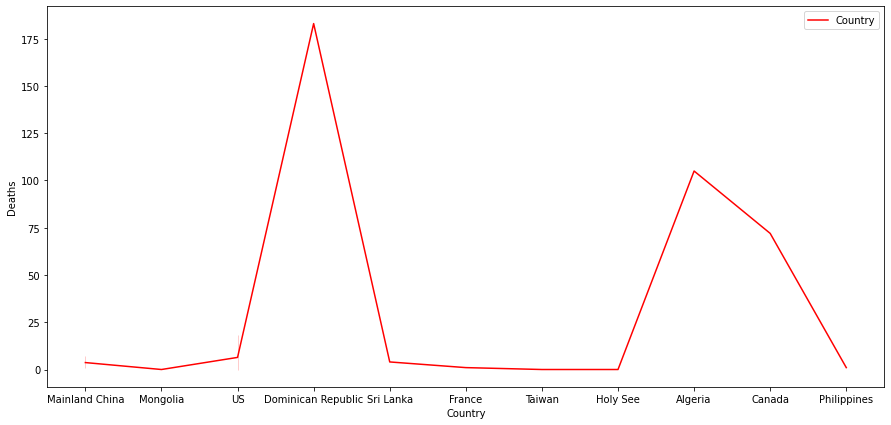

In [68]:
plt.figure(figsize=(15,7))
sns.lineplot('Country', 'Deaths', data = d.sample(20), color = 'r', label= 'Country')
plt.legend()
plt.show()

### pivot_table

In [69]:
d1=d.copy()
d1=d1.pivot_table('Recovered',columns='Country',aggfunc='max')
d1

Country,Azerbaijan,"('St. Martin',)",Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,occupied Palestinian territory
Recovered,0.0,0.0,188.0,394.0,1408.0,344.0,6.0,11.0,976.0,728.0,...,621.0,0.0,132.0,224.0,92.0,5.0,1.0,37.0,2.0,0.0


In [70]:
d1=d.copy()
d1=d1.pivot_table('Confirmed',columns='Country',aggfunc='max')
d1

Country,Azerbaijan,"('St. Martin',)",Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,occupied Palestinian territory
Confirmed,1.0,2.0,1351.0,678.0,3127.0,731.0,25.0,24.0,3607.0,1596.0,...,1804.0,1.0,318.0,270.0,484.0,6.0,1.0,84.0,29.0,25.0


In [71]:
d1=d.copy()
d1=d1.pivot_table('Confirmed',columns='Country',aggfunc='max')
d1

Country,Azerbaijan,"('St. Martin',)",Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,occupied Palestinian territory
Confirmed,1.0,2.0,1351.0,678.0,3127.0,731.0,25.0,24.0,3607.0,1596.0,...,1804.0,1.0,318.0,270.0,484.0,6.0,1.0,84.0,29.0,25.0


### Heatmap

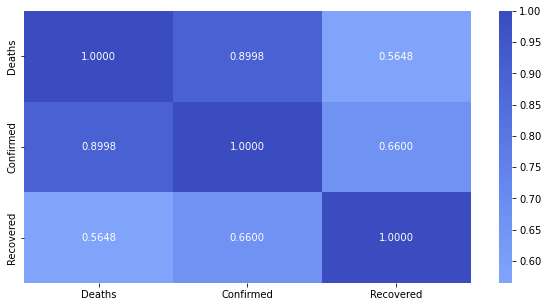

In [72]:
data=['Country','Deaths','Confirmed','Recovered']
plt.figure(figsize=(10,5))
sns.heatmap(d[data].corr(),annot=True,fmt='.4f',cmap='coolwarm_r',center=0)
plt.show()

### Relplot

<Figure size 1440x720 with 0 Axes>

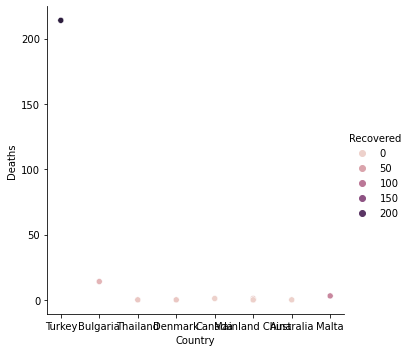

In [73]:
plt.figure(figsize=(20,10))
sns.relplot(x='Country',y='Deaths',hue='Recovered',data=d.sample(10))
plt.show()

### barplot with grid

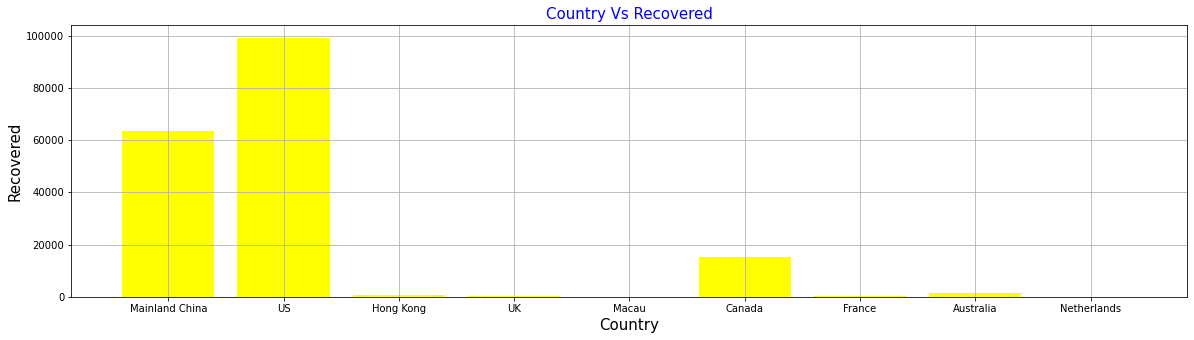

In [75]:
d2=d.tail(100)
plt.figure(figsize=(20,5))
plt.bar(d2['Country'],d2['Recovered'],color="Yellow")
plt.title('Country Vs Recovered',fontsize=15,color='blue')
plt.xlabel('Country',fontsize=15)
plt.ylabel('Recovered',fontsize=15)
plt.grid(True)
plt.show()

### Countplot

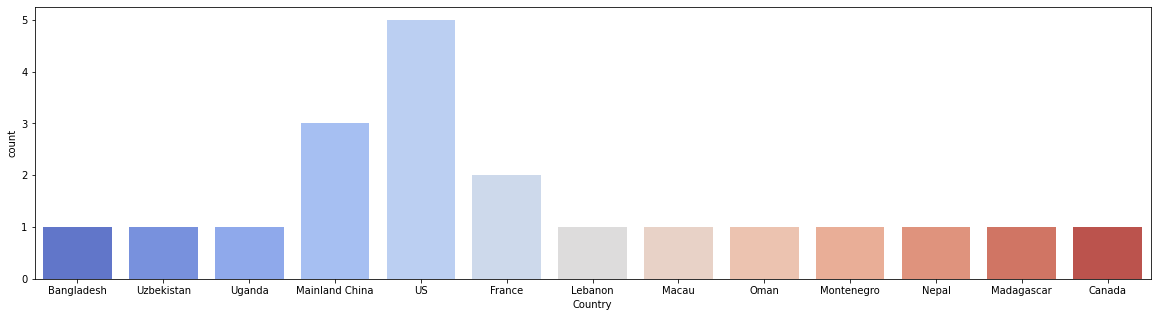

In [76]:
plt.figure(figsize=(20,5))
sns.countplot(x='Country',data=d.sample(20),palette='coolwarm')
plt.show()

<AxesSubplot:xlabel='Country', ylabel='count'>

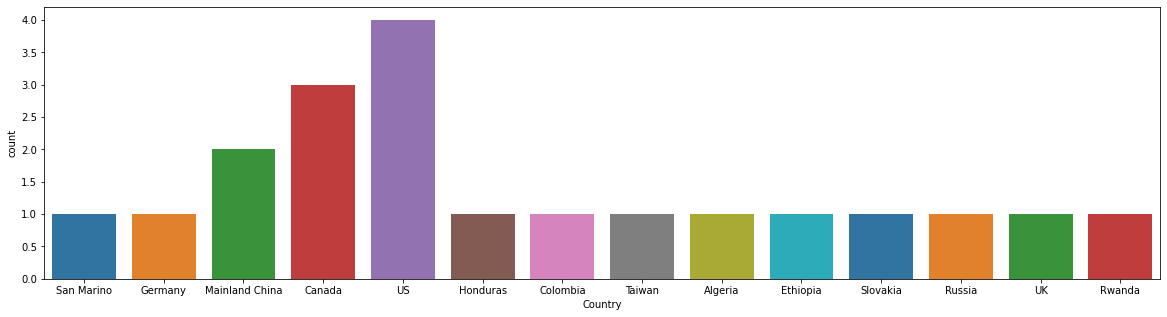

In [77]:
plt.figure(figsize=(20,5))
sns.countplot(x='Country',data=d.sample(20),palette='tab10')

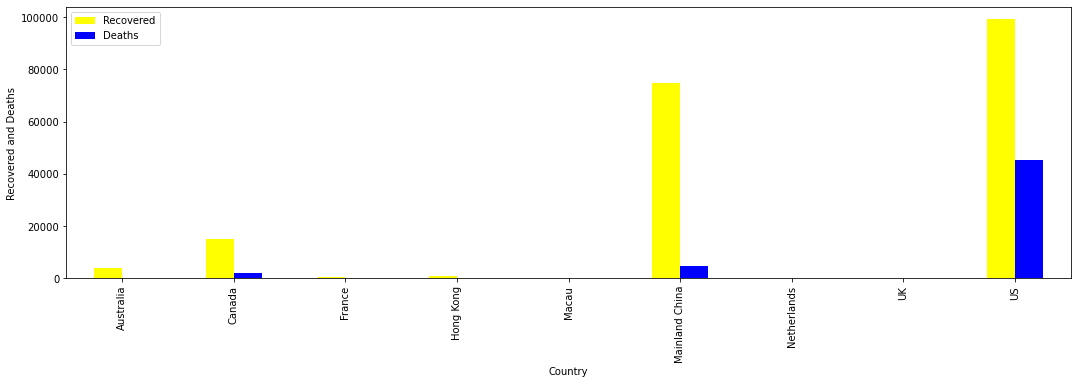

In [78]:
d3=d.tail(100)
d3.groupby('Country')[['Recovered','Deaths']].sum().plot.bar(color=['yellow','blue'],figsize=(18,5))
plt.ylabel('Recovered and Deaths')
plt.show()

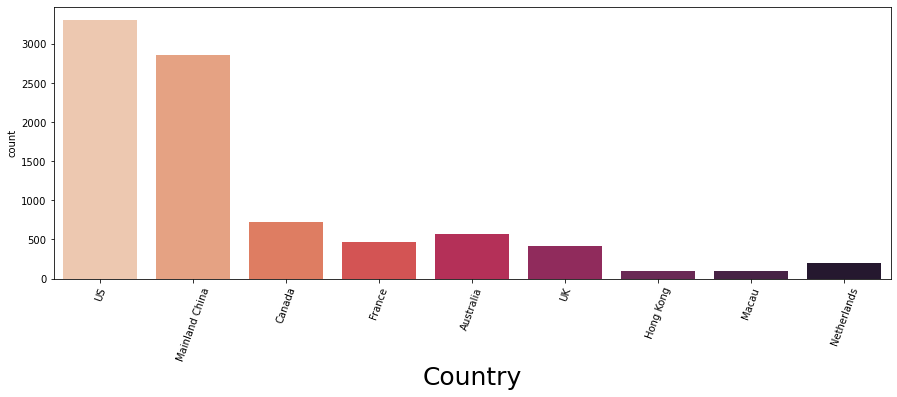

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x="Country",data=d,palette='rocket_r',order=d3['Country'].value_counts().index)
plt.xlabel('Country',fontsize=25)
plt.xticks(rotation=70)
plt.show()

### Datatype

In [80]:
d.dtypes

ObservationDate    datetime64[ns]
Country                    object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

### Histogram

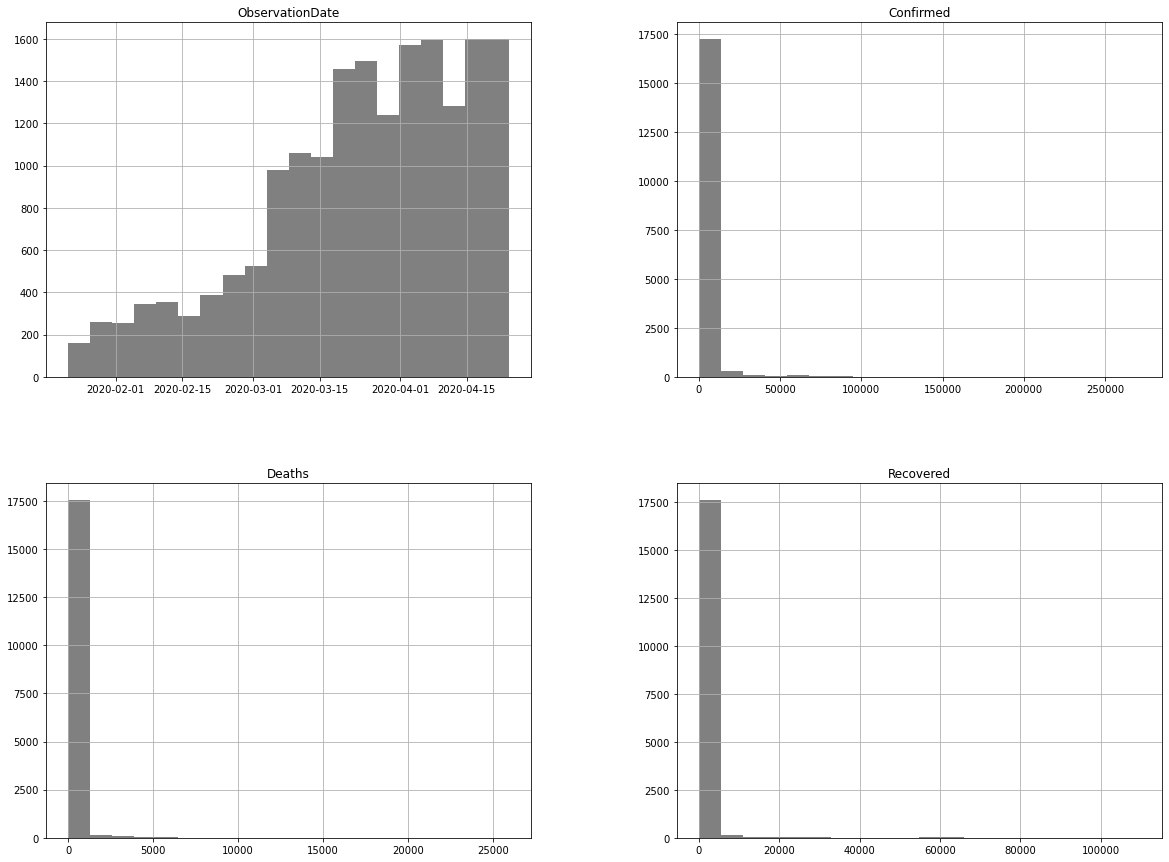

In [84]:
d.hist(bins=20 ,figsize=(20,15),color='grey')
plt.show()

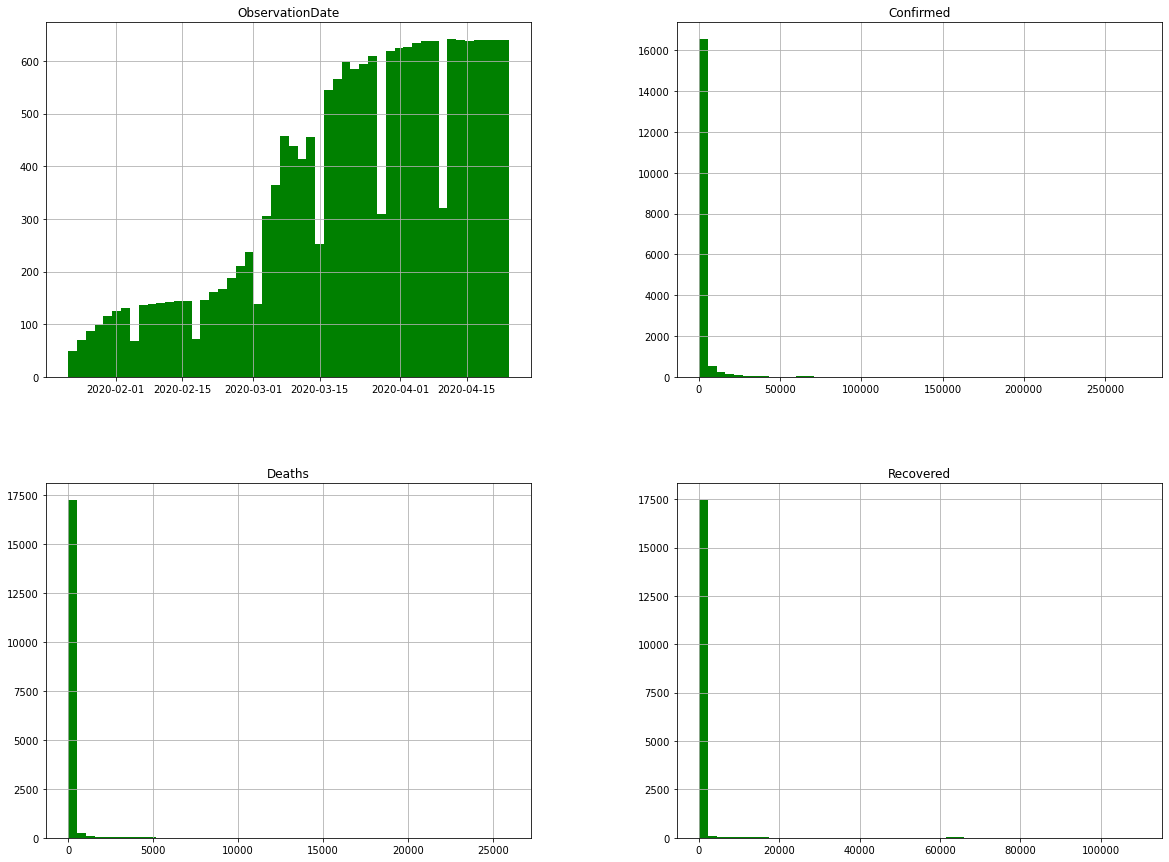

In [83]:
d.hist(bins=50 ,figsize=(20,15),color='green')
plt.show()

### pairplot

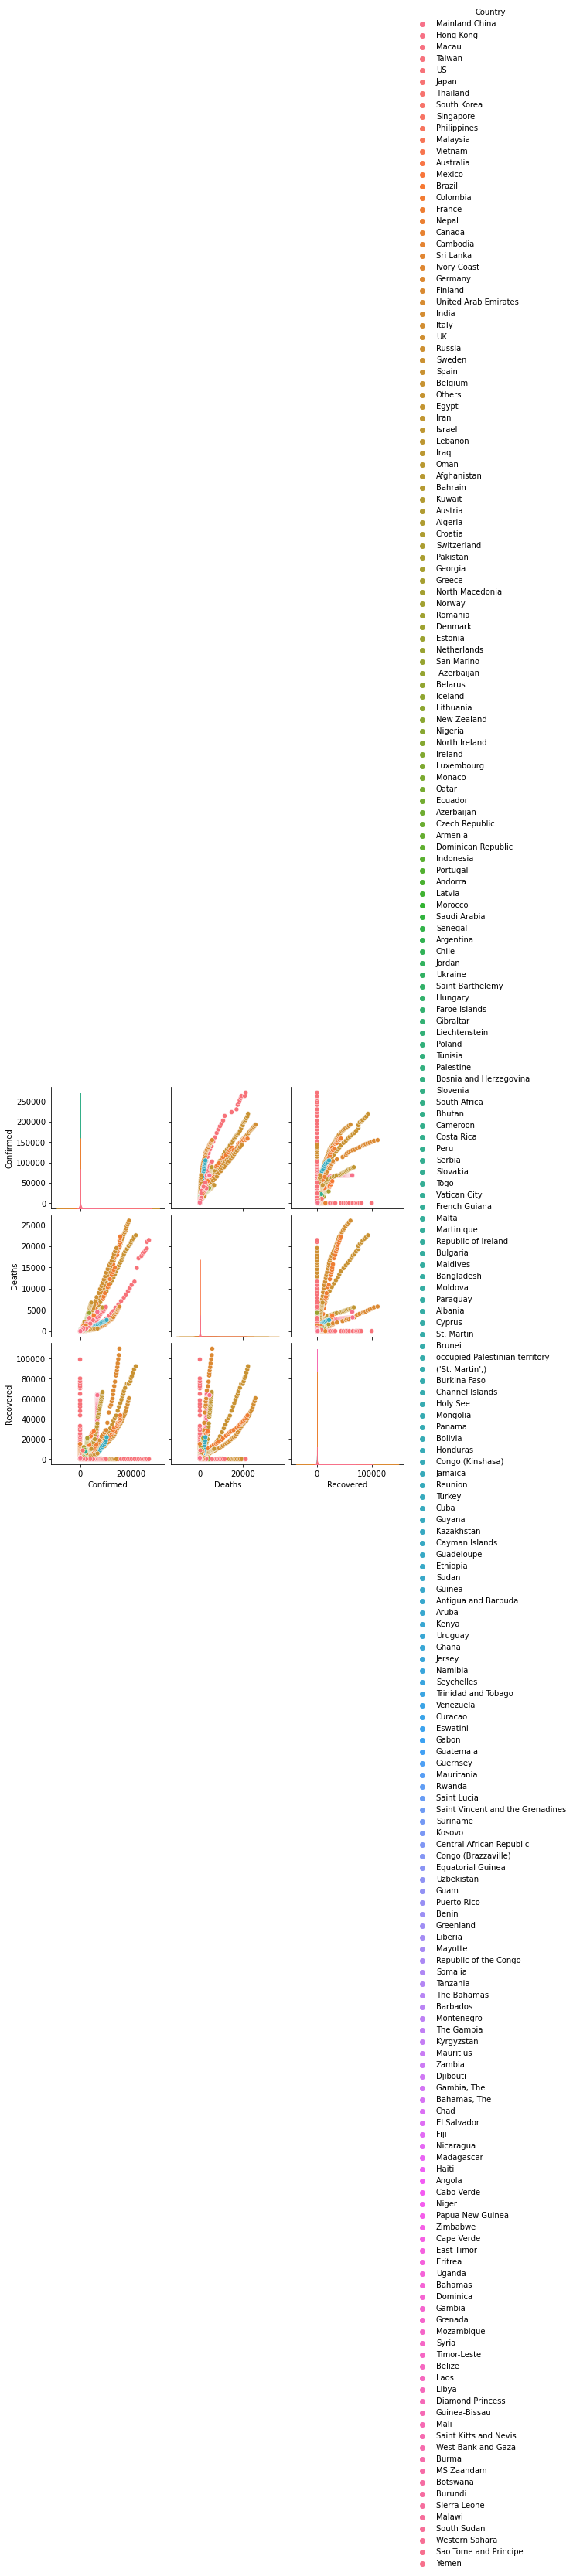

In [85]:
sns.pairplot(d,hue='Country')
plt.show()


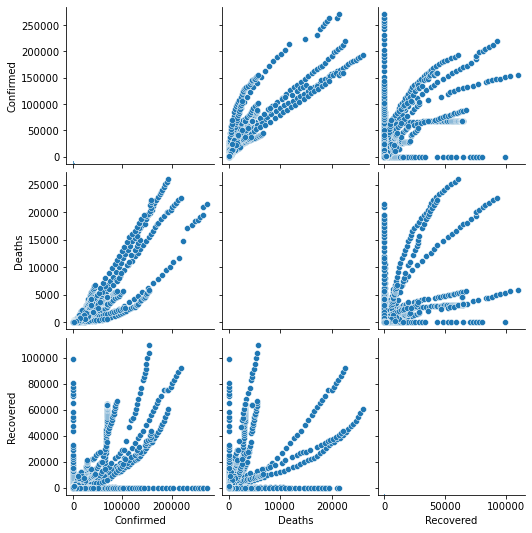

In [86]:
sns.pairplot(d)
plt.show()

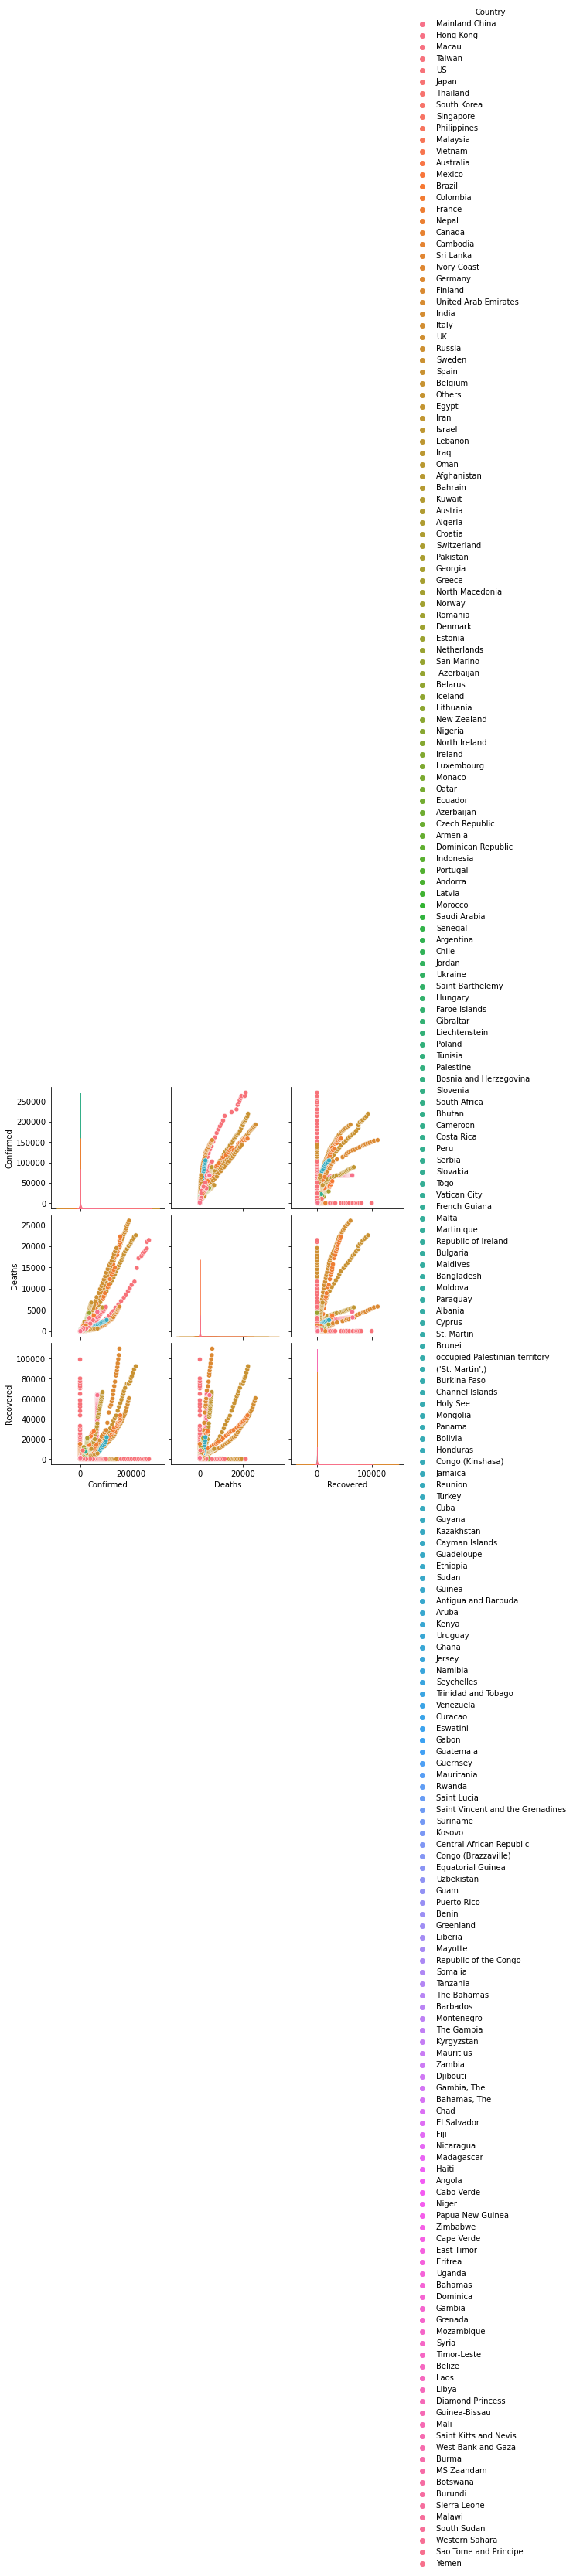

In [87]:
sns.pairplot(d,hue='Country')
plt.show()


In this covid data analysis contain all the cases recovered,total deaths,total cases confirmed shown by country.